## Image segmentation with CamVid

In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [17]:
path = untar_data(URLs.CAMVID,None,'d:\.fastai/data')
path.ls()

[WindowsPath('d:/.fastai/data/camvid/codes.txt'),
 WindowsPath('d:/.fastai/data/camvid/images'),
 WindowsPath('d:/.fastai/data/camvid/labels'),
 WindowsPath('d:/.fastai/data/camvid/valid.txt')]

In [18]:
path_lbl = path/'labels'
path_img = path/'images'

## Subset classes

In [19]:
# path = Path('./data/camvid-small')

# def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

# codes = array(['Sky', 'Building', 'Pole', 'Road', 'Sidewalk', 'Tree',
#     'Sign', 'Fence', 'Car', 'Pedestrian', 'Cyclist', 'Void'])

# src = (SegmentationItemList.from_folder(path)
#        .split_by_folder(valid='val')
#        .label_from_func(get_y_fn, classes=codes))

# bs=8
# data = (src.transform(get_transforms(), tfm_y=True)
#         .databunch(bs=bs)
#         .normalize(imagenet_stats))

## Data

In [20]:
fnames = get_image_files(path_img)
fnames[:3]

[WindowsPath('d:/.fastai/data/camvid/images/0001TP_006690.png'),
 WindowsPath('d:/.fastai/data/camvid/images/0001TP_006720.png'),
 WindowsPath('d:/.fastai/data/camvid/images/0001TP_006750.png')]

In [21]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[WindowsPath('d:/.fastai/data/camvid/labels/0001TP_006690_P.png'),
 WindowsPath('d:/.fastai/data/camvid/labels/0001TP_006720_P.png'),
 WindowsPath('d:/.fastai/data/camvid/labels/0001TP_006750_P.png')]

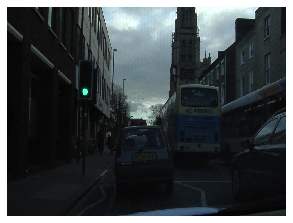

In [22]:
img_f = fnames[0]

img = open_image(img_f)
img.show(figsize=(5,5))

In [23]:
img_f.suffix
type(img_f)

pathlib.WindowsPath

In [24]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'
get_y_fn(img_f)

WindowsPath('d:/.fastai/data/camvid/labels/0001TP_006690_P.png')

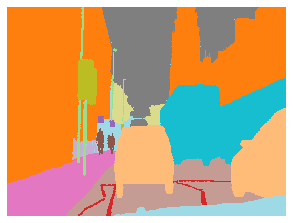

In [25]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [26]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([720, 960]), tensor([[[ 4,  4,  4,  ...,  4,  4,  4],
          [ 4,  4,  4,  ...,  4,  4,  4],
          [ 4,  4,  4,  ...,  4,  4,  4],
          ...,
          [19, 19, 19,  ..., 30, 30, 30],
          [19, 19, 19,  ..., 30, 30, 30],
          [19, 19, 19,  ..., 30, 30, 30]]]))

In [27]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

## Datasets

In [28]:
size = src_size//2

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=4, have 7535MB of GPU RAM free


In [29]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('D:/.fastai/data/camvid/valid.txt')
       .label_from_func(get_y_fn, classes=codes))
src

LabelLists;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: d:\.fastai\data\camvid\images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: d:\.fastai\data\camvid\images;

Test: None

In [30]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))
data

ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: d:\.fastai\data\camvid\images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: d:\.fastai\data\camvid\images;

Test: None

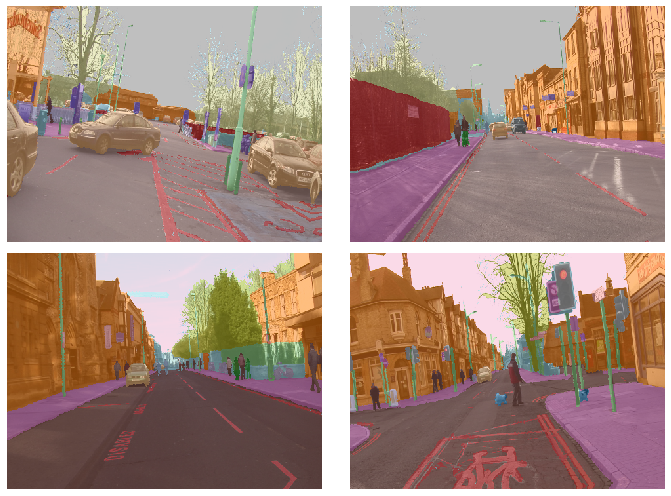

In [31]:
data.show_batch(2, figsize=(10,7))

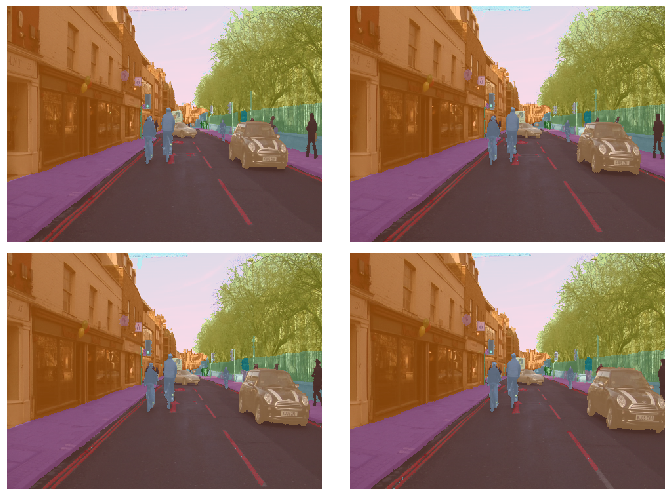

In [32]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

## Model

In [33]:
name2id = {v:k for k,v in enumerate(codes)}

void_code = name2id['Void']
print(void_code)

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

30


In [34]:
metrics=acc_camvid
# metrics=accuracy

In [35]:
wd=1e-2

In [36]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


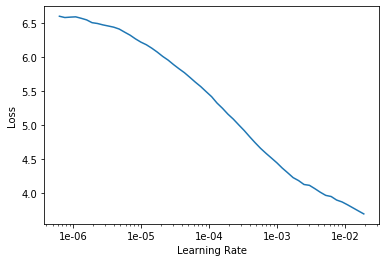

In [37]:
lr_find(learn)
learn.recorder.plot()

In [38]:
lr=3e-3

In [39]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.015076,0.740129,0.825076,01:45
1,0.758324,0.614846,0.831232,01:57
2,0.635315,0.533724,0.854855,01:54
3,0.615125,0.498639,0.861832,01:49
4,0.641199,0.548173,0.851657,02:52
5,0.590203,0.516960,0.854781,02:55
6,0.576268,0.487026,0.866538,02:57
7,0.516071,0.446721,0.883236,03:11
8,0.507993,0.490158,0.873589,02:15
9,0.430571,0.336608,0.903025,01:37


In [40]:
learn.save('stage-1')

In [41]:
learn.load('stage-1');

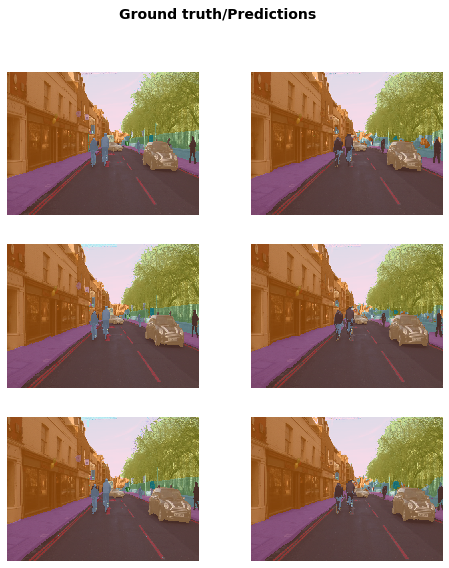

In [42]:
learn.show_results(rows=3, figsize=(8,9))

In [43]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


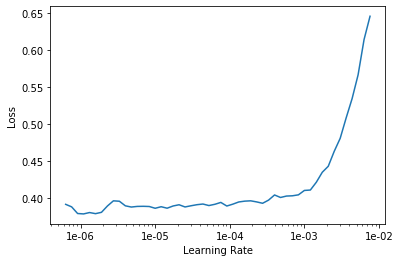

In [44]:
lr_find(learn)
learn.recorder.plot()

In [45]:
lrs = slice(lr/400,lr/4)

In [46]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.384151,0.327064,0.901439,01:41
1,0.372412,0.322620,0.905064,01:41
2,0.374003,0.318105,0.909832,01:41
3,0.355856,0.306713,0.912593,01:41
4,0.356841,0.306867,0.911113,01:41
5,0.345120,0.289707,0.917700,01:41
6,0.342544,0.293575,0.918566,01:42
7,0.335227,0.311943,0.910658,01:44
8,0.331484,0.285138,0.923110,01:45
9,0.321437,0.297180,0.922599,01:41


In [47]:
learn.save('stage-2');

## Go big

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [48]:
learn.destroy()

size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=3
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

this Learner object self-destroyed - it still exists, but no longer usable
using bs=1, have 6604MB of GPU RAM free


In [49]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [50]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [51]:
learn.load('stage-2');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


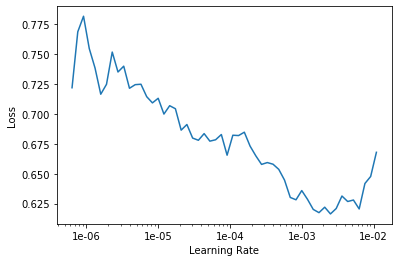

In [52]:
lr_find(learn)
learn.recorder.plot()

In [53]:
lr=1e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.425004,0.298560,0.918645,04:54
1,0.358342,0.297974,0.918800,04:54
2,0.363705,0.285450,0.918017,04:53
3,0.344015,0.318069,0.909841,04:53


In [ ]:
learn.save('stage-1-big')

In [ ]:
learn.load('stage-1-big');

In [ ]:
learn.unfreeze()

In [ ]:
lrs = slice(1e-6,lr/10)

In [ ]:
learn.fit_one_cycle(10, lrs)

In [ ]:
learn.save('stage-2-big')

In [ ]:
learn.load('stage-2-big');

In [ ]:
learn.show_results(rows=3, figsize=(10,10))

## fin